In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [3]:
data = pd.read_csv("http://bit.ly/w-data")

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


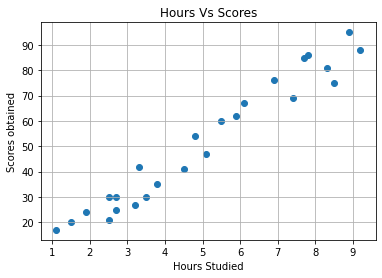

In [8]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

In [11]:
x_train.shape

(17, 1)

In [12]:
x_test.shape

(8, 1)

In [13]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [14]:
LR.coef_ , LR.intercept_

(array([9.78856669]), 2.370815382341881)

In [15]:
#f(x)=m*x+y
line = LR.coef_ * x_train + LR.intercept_

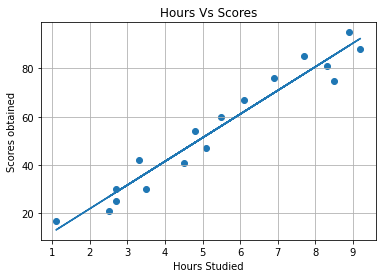

In [16]:
#after linearRegression
plt.scatter(x_train, y_train)
plt.plot(x_train, line)
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

<AxesSubplot:>

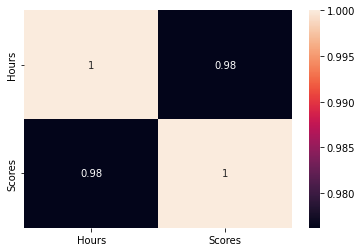

In [17]:
import seaborn as sns
corr=data.corr()
sns.heatmap(corr,annot=True)

In [18]:
pred = LR.predict(x_test)
print(x_test)
print("=======================================")
print(pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [19]:
LR.score(x_test, y_test)

0.9568211104435257

In [20]:
pd.DataFrame(np.c_[x_test, y_test, pred], columns = ["Hours", "Scores", "Scores_Predicted"])

,Hours,Scores,Scores_Predicted
0,1.5,20.0,17.053665
1,3.2,27.0,33.694229
2,7.4,69.0,74.806209
3,2.5,30.0,26.842232
4,5.9,62.0,60.123359
5,3.8,35.0,39.567369
6,1.9,24.0,20.969092
7,7.8,86.0,78.721636


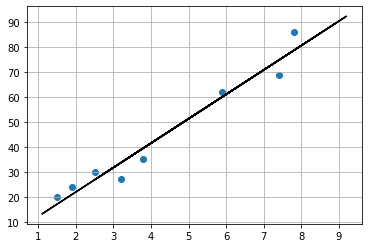

In [21]:
plt.scatter(x_test, y_test)
plt.plot(x_train, LR.predict(x_train), color = "black")
plt.grid()

In [22]:
print('Mean squared Error:', mean_squared_error(y_test, pred)) 

Mean squared Error: 22.96509721270043


In [23]:
Hours = [9.25]
score_predicted = LR.predict([Hours])

print("Number of Hours = {}".format([Hours]))
print("Predicted Scores = {}".format(score_predicted[0]))

Number of Hours = [[9.25]]
Predicted Scores = 92.91505723477056
